## Importing Libraries


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import re

In [ ]:
#Data loading
cs_train_df = pd.read_csv('data/train.csv', low_memory=False)
cs_test_df = pd.read_csv('data/test.csv', low_memory=False)

## Know-How of Data

In [73]:
#configured pandas to display all columns
pd.set_option('display.max_columns', None)

In [74]:
cs_train_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [75]:
#check out the dimensions of th dataset
cs_train_df.shape

(100000, 28)

> Dataset contains `100000` entries meaning `100000 Credit_Score instances` and `28` different attributes to `classify Customers`.

In [76]:
cs_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

- Columns datatypes needs to be fixed.
  - `Age`, `SSN`, `Annual_Income`, `Num_of_loan`, `Num_of_Delayed_Payment`, `Changed_Credit_Limit`, `Outstanding_Debt`, `Amount_invested_monthly`, `Monthly_Balance`
- Missing Values needs to be filled.
  - `Monthly_Inhand_Salary`, `Type_of_Loan`, `Num_of_Delayed_Payment`, `Num_Credit_Inquiries`, `Credit_History_Age`, `Amount_invested_monthly`

In [77]:
cs_train_df.describe(include=[np.number])

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


- '_') Due to the presence of `outliers` & `inconsistencies` it isn't conveying the correct information.

In [78]:
cs_train_df.describe(include=['O']).T

,count,unique,top,freq
ID,100000,100000,0x25fd5,1
Customer_ID,100000,12500,CUS_0x942c,8
Month,100000,8,January,12500
Name,90015,10139,Stevex,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


- There are object columns that are numeric in nature, we need to fix them.

In [79]:
#change the column names to lower case.
cs_train_df.columns = cs_train_df.columns.str.lower()

## Data Cleaning

### Check For Duplicates

In [80]:
cs_train_df.duplicated().sum()

np.int64(0)

In [81]:
cs_train_df.duplicated().any()

np.False_

- The dataset contains 0 `Duplicate` values.

### Null Values Imputation

In [82]:
missing_values = cs_train_df.isnull().sum().sort_values(ascending=False)[cs_train_df.isnull().sum().sort_values(ascending=False) > 0]
missing_values

,0
monthly_inhand_salary,15002
type_of_loan,11408
name,9985
credit_history_age,9030
num_of_delayed_payment,7002
amount_invested_monthly,4479
num_credit_inquiries,1965
monthly_balance,1200


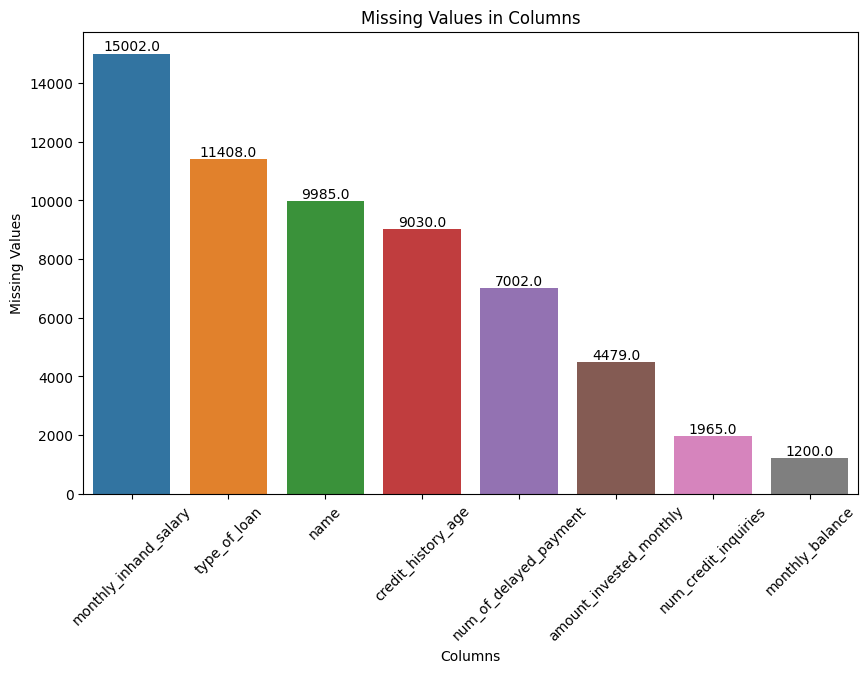

In [83]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=missing_values.index, y=missing_values.values, hue=missing_values.index)
plt.xticks(rotation=45)
plt.xlabel('Columns')
plt.ylabel('Missing Values')
plt.title('Missing Values in Columns')

# Add the counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

> let's deal with null values feature by feature.

#### Monthly_Inhand_Salary

In [84]:
cs_train_df['customer_id'].unique()[:20]

array(['CUS_0xd40', 'CUS_0x21b1', 'CUS_0x2dbc', 'CUS_0xb891',
       'CUS_0x1cdb', 'CUS_0x95ee', 'CUS_0x284a', 'CUS_0x5407',
       'CUS_0x4157', 'CUS_0xba08', 'CUS_0xa66b', 'CUS_0xc0ab',
       'CUS_0x3e45', 'CUS_0x6c66', 'CUS_0xff4', 'CUS_0x33d2',
       'CUS_0x6070', 'CUS_0xfdb', 'CUS_0x3553', 'CUS_0x4100'],
      dtype=object)

In [85]:
cs_train_df[cs_train_df['customer_id'] == 'CUS_0xd40']

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8_,11.27,4.0,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4.0,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard


- Customers are repeating means sometimes they provided their `monthly_inhand_salary` sometimes they didn't, So we need to fill the `monthly_inhand_salary` values with the provided ones with respect to the `customer_id`.

In [86]:
# Fill missing 'monthly_inhand_salary' values using forward and backward fill for each customer_id
cs_train_df['monthly_inhand_salary'] = cs_train_df.groupby('customer_id')['monthly_inhand_salary'].ffill().bfill()

# Display the rows for 'CUS_0x4100' to verify the filled value
display(cs_train_df[cs_train_df['customer_id'] == 'CUS_0xd40'])

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8_,11.27,4.0,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4.0,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard


#### Type_of_Loan

In [87]:
cs_train_df.isnull().sum().sort_values(ascending=False)[cs_train_df.isnull().sum().sort_values(ascending=False) > 0]

,0
type_of_loan,11408
name,9985
credit_history_age,9030
num_of_delayed_payment,7002
amount_invested_monthly,4479
num_credit_inquiries,1965
monthly_balance,1200


- There are `11408` missing values
  - By analyzing the column we can fill them with two conditions:
    - For those customers about we don't know what kind of loan they took, we can fill them with `unknown`.
    - Or with respect to the `Customer_ID` we can fill the values using `mode()`.

In [88]:
cs_train_df[cs_train_df['customer_id']=='CUS_0xc163']

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
7512,0x4206,CUS_0xc163,January,Jason Langeg,19,552-86-7671,Media_Manager,40327.22,3595.601667,5,5,7,-100,NaN,18,1,7.87,4.0,Good,1073.76,30.967817,21 Years and 5 Months,No,0.0,92.59763943544391,!@9#%8,516.9625272312228,Standard
7513,0x4207,CUS_0xc163,February,Jason Langeg,19,552-86-7671,Media_Manager,40327.22,3595.601667,5,5,7,0,NaN,13,0,7.87,4.0,_,1073.76_,26.188641,21 Years and 6 Months,No,0.0,178.7921752628936,Low_spent_Small_value_payments,470.76799140377307,Standard
7514,0x4208,CUS_0xc163,March,Jason Langeg,19,552-86-7671,Media_Manager,40327.22,3595.601667,5,5,7,0,NaN,13,0,7.87,4.0,Good,1073.76,27.760291,NaN,No,0.0,72.43855801789405,High_spent_Medium_value_payments,537.1216086487726,Standard
7515,0x4209,CUS_0xc163,April,Jason Langeg,19_,552-86-7671,Media_Manager,40327.22,3595.601667,5,5,7,0,NaN,13,0,7.87,4.0,Good,1073.76,34.062345,21 Years and 8 Months,No,0.0,131.39680185327686,!@9#%8,478.1633648133899,Standard
7516,0x420a,CUS_0xc163,May,Jason Langeg,19,552-86-7671,Media_Manager,40327.22,3595.601667,5,5,7,0,NaN,13,1,7.87,4.0,Good,1073.76,23.901034,21 Years and 9 Months,NM,0.0,473.0766250643882,Low_spent_Small_value_payments,176.48354160227848,Standard
7517,0x420b,CUS_0xc163,June,Jason Langeg,19,552-86-7671,Media_Manager,40327.22,3595.601667,5,5,7,0,NaN,13,0,7.87,4.0,Good,1073.76,40.159493,21 Years and 10 Months,No,0.0,249.55897110173746,Low_spent_Small_value_payments,400.0011955649293,Standard
7518,0x420c,CUS_0xc163,July,Jason Langeg,19,552-86-7671,Media_Manager,40327.22,3595.601667,5,5,7,0,NaN,13,0_,7.87,4.0,Good,1073.76,36.725802,21 Years and 11 Months,No,0.0,245.2862743243585,Low_spent_Small_value_payments,404.27389234230833,Standard
7519,0x420d,CUS_0xc163,August,Jason Langeg,19,552-86-7671,Media_Manager,40327.22,3595.601667,5,5,7,0,NaN,13,-2,7.87,4.0,Good,1073.76,26.860942,22 Years and 0 Months,NM,0.0,113.91894810928726,High_spent_Medium_value_payments,495.6412185573794,Standard


In [89]:
cs_train_df['type_of_loan'] = cs_train_df.groupby('customer_id')['type_of_loan'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

In [90]:
cs_train_df[cs_train_df['customer_id']=='CUS_0xc163']

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
7512,0x4206,CUS_0xc163,January,Jason Langeg,19,552-86-7671,Media_Manager,40327.22,3595.601667,5,5,7,-100,Unknown,18,1,7.87,4.0,Good,1073.76,30.967817,21 Years and 5 Months,No,0.0,92.59763943544391,!@9#%8,516.9625272312228,Standard
7513,0x4207,CUS_0xc163,February,Jason Langeg,19,552-86-7671,Media_Manager,40327.22,3595.601667,5,5,7,0,Unknown,13,0,7.87,4.0,_,1073.76_,26.188641,21 Years and 6 Months,No,0.0,178.7921752628936,Low_spent_Small_value_payments,470.76799140377307,Standard
7514,0x4208,CUS_0xc163,March,Jason Langeg,19,552-86-7671,Media_Manager,40327.22,3595.601667,5,5,7,0,Unknown,13,0,7.87,4.0,Good,1073.76,27.760291,NaN,No,0.0,72.43855801789405,High_spent_Medium_value_payments,537.1216086487726,Standard
7515,0x4209,CUS_0xc163,April,Jason Langeg,19_,552-86-7671,Media_Manager,40327.22,3595.601667,5,5,7,0,Unknown,13,0,7.87,4.0,Good,1073.76,34.062345,21 Years and 8 Months,No,0.0,131.39680185327686,!@9#%8,478.1633648133899,Standard
7516,0x420a,CUS_0xc163,May,Jason Langeg,19,552-86-7671,Media_Manager,40327.22,3595.601667,5,5,7,0,Unknown,13,1,7.87,4.0,Good,1073.76,23.901034,21 Years and 9 Months,NM,0.0,473.0766250643882,Low_spent_Small_value_payments,176.48354160227848,Standard
7517,0x420b,CUS_0xc163,June,Jason Langeg,19,552-86-7671,Media_Manager,40327.22,3595.601667,5,5,7,0,Unknown,13,0,7.87,4.0,Good,1073.76,40.159493,21 Years and 10 Months,No,0.0,249.55897110173746,Low_spent_Small_value_payments,400.0011955649293,Standard
7518,0x420c,CUS_0xc163,July,Jason Langeg,19,552-86-7671,Media_Manager,40327.22,3595.601667,5,5,7,0,Unknown,13,0_,7.87,4.0,Good,1073.76,36.725802,21 Years and 11 Months,No,0.0,245.2862743243585,Low_spent_Small_value_payments,404.27389234230833,Standard
7519,0x420d,CUS_0xc163,August,Jason Langeg,19,552-86-7671,Media_Manager,40327.22,3595.601667,5,5,7,0,Unknown,13,-2,7.87,4.0,Good,1073.76,26.860942,22 Years and 0 Months,NM,0.0,113.91894810928726,High_spent_Medium_value_payments,495.6412185573794,Standard


#### Name

In [91]:
cs_train_df['name'].unique()[:20]

array(['Aaron Maashoh', nan, 'Rick Rothackerj', 'Langep', 'Jasond',
       'Deepaa', 'Np', 'Nadiaq', 'Annk', 'Charlie Zhur', 'Jamesj',
       'Saphirj', 'Soyoungd', 'Harriet McLeodd', 'Sinead Carews',
       'Poornimaf', 'Chalmersa', 'Parkm', 'Patrickg', 'Laurence Frosty'],
      dtype=object)

In [92]:
cs_train_df[cs_train_df['customer_id'] == 'CUS_0x6070']

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
128,0x16c2,CUS_0x6070,January,Parkm,20,891-55-9364,Accountant,92047.08,7591.59,6,7,16,0,Unknown,16,11,9.13,0.0,Standard,1296.64,37.115615,29 Years and 2 Months,Yes,0.0,154.6341231395093,!@9#%8,854.5248768604907,Standard
129,0x16c3,CUS_0x6070,February,NaN,20,891-55-9364,Accountant,92047.08_,7591.59,6,7,16,0,Unknown,16,11,9.13,4.0,Standard,1296.64,39.467758,29 Years and 3 Months,Yes,0.0,710.4953806729873,Low_spent_Medium_value_payments,328.66361932701284,Standard
130,0x16c4,CUS_0x6070,March,Parkm,20,891-55-9364,Accountant,92047.08,7591.59,6,7,16,0,Unknown,18,11,9.13,4.0,_,1296.64,27.792788,29 Years and 4 Months,Yes,0.0,175.4456226582996,High_spent_Large_value_payments,823.7133773417005,Standard
131,0x16c5,CUS_0x6070,April,Parkm,20,891-55-9364,Accountant,92047.08,7591.59,6,7,16,0_,Unknown,16,11,9.13,4.0,Standard,1296.64,42.944682,NaN,Yes,0.0,120.90755376622221,High_spent_Large_value_payments,878.2514462337779,Poor
132,0x16c6,CUS_0x6070,May,Parkm,20,#F%$D@*&8,Accountant,92047.08,7591.59,6,7,16,0,Unknown,16,8,9.13,4.0,Standard,1296.64,34.357650,29 Years and 6 Months,NM,0.0,78.71934549426288,High_spent_Large_value_payments,920.4396545057373,Poor
133,0x16c7,CUS_0x6070,June,Parkm,20,891-55-9364,Accountant,92047.08,7591.59,6,7,16,0,Unknown,16,13,13.13,4.0,Standard,1296.64,28.776938,NaN,Yes,0.0,266.5850272142179,Low_spent_Small_value_payments,782.5739727857823,Poor
134,0x16c8,CUS_0x6070,July,NaN,20,891-55-9364,Accountant,92047.08,7591.59,6,7,16,0,Unknown,16,10,9.13,4.0,_,1296.64,40.758522,29 Years and 8 Months,Yes,0.0,59.28557022863863,High_spent_Large_value_payments,939.8734297713614,Poor
135,0x16c9,CUS_0x6070,August,Parkm,20,891-55-9364,Accountant,92047.08,7591.59,6,7,16,0,Unknown,16,11,9.13,4.0,Standard,1296.64,27.727647,29 Years and 9 Months,Yes,0.0,268.0846032992916,Low_spent_Large_value_payments,761.0743967007086,Poor


- We can fill missing values in `name` column with respect to the `customer_id` column.

In [93]:
#fills the missing values based on the customer_id column
cs_train_df['name'] = cs_train_df.groupby('customer_id')['name'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

because a unique person will have unique customer_id if the customer shows up again it will have the same customer_id and based on the previous value of the same customer_id we can fill up the missing values.

#### Credit_History_Age

In [94]:
cs_train_df.isnull().sum().sort_values(ascending=False)[cs_train_df.isnull().sum().sort_values(ascending=False) > 0]

,0
credit_history_age,9030
num_of_delayed_payment,7002
amount_invested_monthly,4479
num_credit_inquiries,1965
monthly_balance,1200


In [95]:
cs_train_df['credit_history_age'].unique()[:10]

array(['22 Years and 1 Months', nan, '22 Years and 3 Months',
       '22 Years and 4 Months', '22 Years and 5 Months',
       '22 Years and 6 Months', '22 Years and 7 Months',
       '26 Years and 7 Months', '26 Years and 8 Months',
       '26 Years and 9 Months'], dtype=object)

In [96]:
cs_train_df[cs_train_df['customer_id'] == 'CUS_0xd40']

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8_,11.27,4.0,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,Aaron Maashoh,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4.0,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard


In [97]:
# Apply ffill to fill initial missing credit_history_age values within each customer group
cs_train_df['credit_history_age'] = cs_train_df.groupby('customer_id')['credit_history_age'].ffill().bfill()

# Convert 'credit_history_age' to total months for easier calculation
def years_months_to_months(age_str):
    if pd.isnull(age_str):
        return np.nan
    parts = age_str.replace(' Years and ', ' ').replace(' Months', '').split()
    if len(parts) == 2:
        years, months = int(parts[0]), int(parts[1])
        return years * 12 + months
    return np.nan # Handle cases that don't match the format

cs_train_df['credit_history_months_total'] = cs_train_df['credit_history_age'].apply(years_months_to_months)

In [98]:
# Calculate the initial credit history in months for each customer
initial_credit_history = cs_train_df.groupby('customer_id')['credit_history_months_total'].transform('first')

In [99]:
# Calculate the number of months passed for each entry within each customer group
# Assuming the data is ordered by month for each customer
months_passed = cs_train_df.groupby('customer_id').cumcount()

# Calculate the new credit history in total months
cs_train_df['credit_history_months_incremented'] = initial_credit_history + months_passed

In [100]:
# Convert total months back to "XX Years and YY Months" format
def months_total_to_years_months(total_months):
    if pd.isnull(total_months):
        return np.nan
    years = int(total_months // 12)
    months = int(total_months % 12)
    return f"{years} Years and {months} Months"

cs_train_df['credit_history_age_filled_incremented'] = cs_train_df['credit_history_months_incremented'].apply(months_total_to_years_months)

# Display the original and new columns for a sample customer to verify
display(cs_train_df[['customer_id', 'month', 'credit_history_age', 'credit_history_age_filled_incremented']].head(20))

,customer_id,month,credit_history_age,credit_history_age_filled_incremented
0,CUS_0xd40,January,22 Years and 1 Months,22 Years and 1 Months
1,CUS_0xd40,February,22 Years and 1 Months,22 Years and 2 Months
2,CUS_0xd40,March,22 Years and 3 Months,22 Years and 3 Months
3,CUS_0xd40,April,22 Years and 4 Months,22 Years and 4 Months
4,CUS_0xd40,May,22 Years and 5 Months,22 Years and 5 Months
5,CUS_0xd40,June,22 Years and 6 Months,22 Years and 6 Months
6,CUS_0xd40,July,22 Years and 7 Months,22 Years and 7 Months
7,CUS_0xd40,August,22 Years and 7 Months,22 Years and 8 Months
8,CUS_0x21b1,January,26 Years and 7 Months,26 Years and 7 Months
9,CUS_0x21b1,February,26 Years and 8 Months,26 Years and 8 Months


- We want to increment the month count for the subsequent entries of the same customer to reflect the passage of time.

 This requires a few steps: extracting the current years and months, converting them to a total number of months, adding 1 month for each subsequent entry of a customer, and then converting the total months back into the "XX Years and YY Months" format.

#### Num_of_Delayed_Payments

In [101]:
cs_train_df.isnull().sum().sort_values(ascending=False)[cs_train_df.isnull().sum().sort_values(ascending=False) > 0]

,0
num_of_delayed_payment,7002
amount_invested_monthly,4479
num_credit_inquiries,1965
monthly_balance,1200


In [102]:
cs_train_df['num_of_delayed_payment'].unique()[:10]

array(['7', nan, '4', '8_', '6', '1', '-1', '3_', '0', '8'], dtype=object)

- We can note that the `num_of_delayed_payment` can't be negative and the underscores dosn't imply anything, we need to fix it.

In [103]:
#remove inconsistencies
cs_train_df['num_of_delayed_payment'] = cs_train_df['num_of_delayed_payment'].replace('-', '').replace('_', '')

#fill missing values
cs_train_df['num_of_delayed_payment'] = cs_train_df.groupby('customer_id')['num_of_delayed_payment'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 0))

#### Amount_Invested_Monthly

In [104]:
cs_train_df.isnull().sum().sort_values(ascending=False)[cs_train_df.isnull().sum().sort_values(ascending=False) > 0]

,0
amount_invested_monthly,4479
num_credit_inquiries,1965
monthly_balance,1200


In [105]:
cs_train_df[cs_train_df['amount_invested_monthly'] == '__10000__']

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score,credit_history_months_total,credit_history_months_incremented,credit_history_age_filled_incremented
18,0x161c,CUS_0x2dbc,March,Langep,34,486-85-3974,_______,143162.64,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",8,7,11.1,NaN,Good,1303.01,26.519815,17 Years and 11 Months,No,246.992319,__10000__,High_spent_Small_value_payments,715.741367403555,Good,215,215,17 Years and 11 Months
23,0x1621,CUS_0x2dbc,August,Langep,34,486-85-3974,Engineer,143162.64,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",8,6,7.1,3.0,Good,1303.01,38.374753,18 Years and 4 Months,No,246.992319,__10000__,High_spent_Small_value_payments,895.494583180492,Standard,220,220,18 Years and 4 Months
28,0x162a,CUS_0xb891,May,Jasond,55,072-31-6145,Entrepreneur,30689.89,2612.490833,2,5,4,1,Not Specified,5,6,-1.01,4.0,Good,632.46,41.154317,17 Years and 7 Months,No,16.415452,__10000__,Low_spent_Large_value_payments,359.37491550776383,Standard,211,211,17 Years and 7 Months
121,0x16b7,CUS_0x33d2,February,Chalmersa,30,965-46-2491,Scientist,31993.78,2942.148333,6,6,7,2,"Payday Loan, and Home Equity Loan",12,14,6.28,0.0,Standard,818.22,37.958569,16 Years and 11 Months,Yes,45.141298,__10000__,Low_spent_Small_value_payments,157.86980351234496,Standard,203,203,16 Years and 11 Months
142,0x16d4,CUS_0xfdb,July,Patrickg,46,928-91-4452,Teacher,32284.62,2898.385000,6,7,17,6,"Credit-Builder Loan, Not Specified, Mortgage L...",7,12,9.22,10.0,Standard,1283.37_,24.205533,6 Years and 11 Months,Yes,103.037560,__10000__,Low_spent_Small_value_payments,85.90209492602362,Standard,83,83,6 Years and 11 Months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99879,0x25f39,CUS_0x3855,August,Xolai,27,#F%$D@*&8,Scientist,118677.54,9963.795000,4,4,6,4,"Debt Consolidation Loan, Personal Loan, Credit...",3,11,9.59,5.0,Good,995.47,39.747228,30 Years and 6 Months,No,237.106366,__10000__,High_spent_Medium_value_payments,801.7522964700404,Good,366,366,30 Years and 6 Months
99882,0x25f40,CUS_0x47fa,March,Yantoultra Nguif,31,291-51-7240,Mechanic,16884797.0,5440.945000,7,3,1947,0,Unknown,7,8,12.57,2.0,Standard,330.6,38.524095,23 Years and 0 Months,Yes,0.000000,__10000__,High_spent_Small_value_payments,536.3429201945062,Standard,276,277,23 Years and 1 Months
99919,0x25f75,CUS_0x1619,August,Phil Wahbao,54,683-59-7399,Media_Manager,20059.98,1523.665000,8,5,12,966,"Home Equity Loan, Payday Loan, Not Specified, ...",25,11,2.97,8.0,Good,909.01,32.473773,16 Years and 10 Months,No,45.076827,__10000__,Low_spent_Small_value_payments,267.1849850078536,Poor,202,202,16 Years and 10 Months
99951,0x25fa5,CUS_0x51b3,August,Ryana,33,837-85-9800,Media_Manager,59146.36,4908.863333,3,6,6,1,Personal Loan,8,6,6.68,5.0,Good,418.03,27.682186,20 Years and 8 Months,No,26.778419,__10000__,Low_spent_Large_value_payments,389.4884832490341,Standard,248,249,20 Years and 9 Months


In [106]:
#remove inconsistencies
cs_train_df['amount_invested_monthly'] = cs_train_df['amount_invested_monthly'].astype(str).str.replace('__', '', regex=False)

#change the datatype
cs_train_df['amount_invested_monthly'] = cs_train_df['amount_invested_monthly'].astype(float)

#fill null values
cs_train_df['amount_invested_monthly'] = cs_train_df.groupby('customer_id')['amount_invested_monthly'].transform(lambda x: x.fillna(x.mean() if pd.notna(x.mean()) else 0))

#### Num_Credit_Inquiries

- The num_credit_inquiries column likely represents the number of recent credit inquiries made for a customer. Credit inquiries happen when a lender checks your credit report, usually when you apply for new credit (like a loan or credit card).

  In the context of credit scoring, a high number of recent credit inquiries can sometimes negatively impact a credit score as it might suggest a higher risk of taking on too much debt.

In [107]:
cs_train_df.isnull().sum().sort_values(ascending=False)[cs_train_df.isnull().sum().sort_values(ascending=False) > 0]

,0
num_credit_inquiries,1965
monthly_balance,1200


In [108]:
#fill the null values
cs_train_df['num_credit_inquiries'] = cs_train_df.groupby('customer_id')['num_credit_inquiries'].ffill().bfill()

#### Monthly_Balance

- **Overdraft**: If an account holder withdraws more money than is available in their account, the bank might allow the transaction to go through, resulting in an negative balance. This is known as an overdraft. Banks often charge fees for overdrafts.
- **Fees and Charges:** Bank fees (like monthly maintenance fees, ATM fees, or late payment fees on linked credit products) can sometimes bring an account balance below zero if there aren't sufficient funds to cover them.
- **Linked Credit Products**: If the bank account is linked to a credit card, loan, or line of credit, payments or charges related to these products might sometimes be drawn from the bank account, potentially resulting in a negative balance if the account is not adequately funded.
In essence, a negative monthly balance indicates that the account holder owes the bank money.

In [109]:
cs_train_df.isnull().sum().sort_values(ascending=False)[cs_train_df.isnull().sum().sort_values(ascending=False) > 0]

,0
monthly_balance,1200


In [110]:
cs_train_df['monthly_balance'].dtype

dtype('O')

In [111]:
# Check for non-digit characters in the 'monthly_balance' column
inconsistent_values = cs_train_df[cs_train_df['monthly_balance'].astype(str).apply(lambda x: bool(re.search(r'[^\d.]', x)))]

if not inconsistent_values.empty:
    print("Inconsistencies found in 'monthly_balance' column:")
    # Display up to 10 inconsistent values as examples
    print(inconsistent_values['monthly_balance'].unique()[:10])
else:
    print("No obvious inconsistencies (non-digit characters other than '.') found in 'monthly_balance'.")

Inconsistencies found in 'monthly_balance' column:
[nan '__-333333333333333333333333333__']


In [112]:
cs_train_df['monthly_balance'] = cs_train_df['monthly_balance'].str.replace('__', '', regex=False)
#change the dtype
cs_train_df['monthly_balance'] = pd.to_numeric(cs_train_df['monthly_balance'], errors='coerce')
#verify the dtype
cs_train_df['monthly_balance'].dtype
#fill the null values
cs_train_df['monthly_balance'] = cs_train_df.groupby('customer_id')['monthly_balance'].transform(lambda x: x.fillna(x.mean() if pd.notna(x.mean()) else 0))

### Fixing DataTypes
- Columns datatypes needs to be fixed.
  - `Age`, `SSN`, `Annual_Income`, `Num_of_loan`, `Num_of_Delayed_Payment`, `Changed_Credit_Limit`, `Outstanding_Debt`, `Amount_invested_monthly`, `Monthly_Balance`

In [113]:
print(cs_train_df['age'].dtype)
print(cs_train_df['age'].min())
print(cs_train_df['age'].max())
print(cs_train_df['age'].describe())

object
-500
995
count     100000
unique      1788
top           38
freq        2833
Name: age, dtype: object


In [114]:
cs_train_df[cs_train_df['age'].apply(lambda x: bool(re.search(r'[^\d]', x)))]

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score,credit_history_months_total,credit_history_months_incremented,credit_history_age_filled_incremented
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,267,267,22 Years and 3 Months
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,4,5.42,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard,319,319,26 Years and 7 Months
54,0x1650,CUS_0x284a,July,Nadiaq,34_,#F%$D@*&8,Lawyer,10909427.0,10469.207759,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,2_,9.34,4.0,Good,352.16,26.947565,31 Years and 1 Months,No,911.220179,930.391898,!@9#%8,326.241830,Good,373,373,31 Years and 1 Months
58,0x1658,CUS_0x5407,March,Annk,30_,500-92-6408,Media_Manager,34081.38,2611.115000,8,7,15,3,"Not Specified, Auto Loan, and Student Loan",31,14,17.13,5.0,Standard,1704.18,35.111552,14 Years and 9 Months,Yes,70.478333,199.720765,Low_spent_Large_value_payments,260.912402,Poor,177,178,14 Years and 10 Months
71,0x1669,CUS_0x4157,August,Charlie Zhur,24_,070-19-1622,Doctor,114838.41,9843.867500,2,5,7,3,"Personal Loan, Debt Consolidation Loan, and Au...",11,11,8.24,8.0,Good,1377.74,27.813354,21 Years and 11 Months,No,226.892792,254.571767,High_spent_Large_value_payments,742.922191,Standard,263,263,21 Years and 11 Months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99933,0x25f8b,CUS_0xb11c,June,Yinka Adegokej,38_,546-94-4789,Manager,15319.65,1460.637500,6,7,15,4,"Home Equity Loan, Auto Loan, Auto Loan, and Au...",54,16,17.13,6.0,Bad,1453.61,24.846424,11 Years and 2 Months,Yes,28.182033,45.611718,High_spent_Small_value_payments,332.269998,Standard,134,134,11 Years and 2 Months
99937,0x25f93,CUS_0xad4f,February,Sabina Zawadzkig,-500,226-45-0652,_______,22620.79,1722.065833,7,3,9,0_,Unknown,25,18,5.31,2.0,Standard,642.46,31.841872,29 Years and 3 Months,No,0.000000,105.076293,Low_spent_Large_value_payments,337.130290,Standard,351,352,29 Years and 4 Months
99942,0x25f98,CUS_0xad4f,July,Sabina Zawadzkig,48_,#F%$D@*&8,Developer,22620.79,1722.065833,6,2,9,0,Unknown,27,17,1.3099999999999996,2.0,Standard,642.46,24.714779,29 Years and 9 Months,No,0.000000,16.532189,High_spent_Large_value_payments,395.674395,Poor,357,357,29 Years and 9 Months
99963,0x25fb9,CUS_0x372c,April,Lucia Mutikanik,-500,340-85-7301,Lawyer,42903.79,3468.315833,0,4,6,1,Not Specified,14,0,5.1,1.0,Good,1079.48,30.625298,28 Years and 3 Months,No,34.975457,31.193919,High_spent_Large_value_payments,520.662207,Standard,339,340,28 Years and 4 Months


In [115]:
# Check for non-digit characters in the 'age' column
inconsistent_age_values = cs_train_df[cs_train_df['age'].astype(str).apply(lambda x: bool(re.search(r'[^\d]', x)))]

if not inconsistent_age_values.empty:
    print("Inconsistent values found in 'age' column:")
    # Display all unique inconsistent age values
    print(inconsistent_age_values['age'].unique())
else:
    print("No obvious inconsistencies (non-digit characters) found in 'age'.")

Inconsistent values found in 'age' column:
['-500' '28_' '34_' '30_' '24_' '33_' '35_' '31_' '40_' '37_' '54_' '21_'
 '20_' '43_' '38_' '18_' '2111_' '46_' '16_' '19_' '47_' '53_' '25_' '27_'
 '55_' '42_' '48_' '49_' '50_' '32_' '22_' '17_' '29_' '15_' '51_' '26_'
 '39_' '14_' '36_' '44_' '7670_' '45_' '23_' '41_' '52_' '733_' '5769_'
 '4383_' '56_' '2650_' '3307_' '6962_' '5589_' '6556_' '1447_' '8153_'
 '3834_' '6744_' '6471_' '7723_' '7640_' '6408_' '3502_' '7316_' '1102_'
 '8669_' '2463_' '6666_' '3055_' '1248_' '2220_' '2159_' '4583_' '3988_'
 '2155_' '6770_' '1843_' '1367_' '3742_' '2171_' '5109_' '3984_' '2474_'
 '5046_' '7715_' '2329_' '707_' '844_' '2756_' '2037_' '902_' '8523_'
 '3640_' '3998_' '3712_' '2097_' '8348_' '5373_' '3291_' '2994_' '3339_'
 '2812_' '3578_' '3564_' '1794_' '737_' '4301_' '2846_' '2373_' '1188_'
 '8207_' '5909_' '6381_' '8616_' '6799_' '1591_' '3775_' '6564_' '7122_'
 '4913_' '5697_' '3843_' '4445_' '6921_' '780_' '1070_' '5798_' '4808_']


In [116]:
# Replace '-' and '_' in 'age' column with empty string
cs_train_df['age'] = cs_train_df['age'].astype(str).str.replace(r'[-_]', '', regex=True)

In [117]:

# Check for non-digit characters in the 'age' column
inconsistent_age_values = cs_train_df[cs_train_df['age'].astype(str).apply(lambda x: bool(re.search(r'[^\d]', x)))]

if not inconsistent_age_values.empty:
    print("Inconsistent values found in 'age' column:")
    # Display all unique inconsistent age values
    print(inconsistent_age_values['age'].unique())
else:
    print("No obvious inconsistencies (non-digit characters) found in 'age'.")

No obvious inconsistencies (non-digit characters) found in 'age'.


In [118]:
cs_train_df['age'] = pd.to_numeric(cs_train_df['age'], errors='coerce')

In [119]:
# Replace VALUES FROM THE AGE COLUMN GREATER THAN 100 with np.nan
cs_train_df['age'] = cs_train_df['age'].apply(lambda x: np.nan if x > 100 else x)

- As we all know that a person age could be maximumly of `100` years, It can go high but this is a one in million case. So, we'll just go with the 100.

In [120]:
cs_train_df['age'].isnull().sum()

np.int64(2776)

In [121]:
#fill null values
cs_train_df['age'] = cs_train_df.groupby('customer_id')['age'].transform(lambda x: x.fillna(x.mean() if pd.notna(x.mean()) else 0))

In [122]:
print(cs_train_df['age'].describe())

count    100000.000000
mean         33.314434
std          10.773858
min          14.000000
25%          24.000000
50%          33.000000
75%          42.000000
max         100.000000
Name: age, dtype: float64


- It is telling us that we have customers of age 100, let's see if we really have.

In [123]:
#get the customer of age 100
cs_train_df[cs_train_df['age']== 100]

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score,credit_history_months_total,credit_history_months_incremented,credit_history_age_filled_incremented
29316,0xc1c6,CUS_0x3b9a,May,Seetharamanw,100.0,983-37-5040,Doctor,30819.56,2547.296667,7,3,9,4,"Payday Loan, Student Loan, Not Specified, and ...",8,775,7.68,5.0,Standard,401.26,39.025723,14 Years and 5 Months,Yes,96.848591,28.766089,High_spent_Large_value_payments,369.114986,Standard,173,173,14 Years and 5 Months


In [124]:
#see if the customer has consistent age across customer_id
cs_train_df[cs_train_df['customer_id']== 'CUS_0x3b9a']

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score,credit_history_months_total,credit_history_months_incremented,credit_history_age_filled_incremented
29312,0xc1c2,CUS_0x3b9a,January,Seetharamanw,32.0,983-37-5040,Doctor,30819.56,2547.296667,7,3,9,4,"Payday Loan, Student Loan, Not Specified, and ...",8,12,7.68,5.0,Standard,401.26,26.590222,14 Years and 1 Months,NM,96.848591,85.297441,!@9#%8,322.583635,Standard,169,169,14 Years and 1 Months
29313,0xc1c3,CUS_0x3b9a,February,Seetharamanw,32.0,983-37-5040,Doctor,30819.56,2547.296667,7,3,9,4,"Payday Loan, Student Loan, Not Specified, and ...",8,14,7.68,5.0,Standard,401.26,38.868023,14 Years and 2 Months,Yes,96.848591,70.862181,High_spent_Medium_value_payments,337.018894,Standard,170,170,14 Years and 2 Months
29314,0xc1c4,CUS_0x3b9a,March,Seetharamanw,32.0,983-37-5040,Doctor,30819.56,2547.296667,7,3,9,4,"Payday Loan, Student Loan, Not Specified, and ...",8,13,7.68,5.0,Standard,401.26,34.071673,14 Years and 2 Months,Yes,96.848591,216.569366,Low_spent_Small_value_payments,231.311710,Standard,170,171,14 Years and 3 Months
29315,0xc1c5,CUS_0x3b9a,April,Seetharamanw,32.0,983-37-5040,Doctor,30819.56,2547.296667,7,3,9,4,"Payday Loan, Student Loan, Not Specified, and ...",8,11,7.68,5.0,Standard,401.26,22.477659,14 Years and 4 Months,Yes,96.848591,86.917758,Low_spent_Small_value_payments,360.963318,Standard,172,172,14 Years and 4 Months
29316,0xc1c6,CUS_0x3b9a,May,Seetharamanw,100.0,983-37-5040,Doctor,30819.56,2547.296667,7,3,9,4,"Payday Loan, Student Loan, Not Specified, and ...",8,775,7.68,5.0,Standard,401.26,39.025723,14 Years and 5 Months,Yes,96.848591,28.766089,High_spent_Large_value_payments,369.114986,Standard,173,173,14 Years and 5 Months
29317,0xc1c7,CUS_0x3b9a,June,Seetharamanw,32.0,983-37-5040,Doctor,30819.56,2547.296667,7,3,9,4,"Payday Loan, Student Loan, Not Specified, and ...",8,12,7.68,5.0,_,401.26,24.569794,14 Years and 6 Months,Yes,96.848591,270.008757,Low_spent_Small_value_payments,177.872319,Standard,174,174,14 Years and 6 Months
29318,0xc1c8,CUS_0x3b9a,July,Seetharamanw,32.0,983-37-5040,Doctor,30819.56,2547.296667,7,3,9,4,"Payday Loan, Student Loan, Not Specified, and ...",11,9,7.68,5.0,Standard,401.26,26.333356,14 Years and 6 Months,NM,96.848591,173.783432,Low_spent_Small_value_payments,274.097644,Standard,174,175,14 Years and 7 Months
29319,0xc1c9,CUS_0x3b9a,August,Seetharamanw,32.0,983-37-5040,Doctor,30819.56,2547.296667,7,3,9,4,"Payday Loan, Student Loan, Not Specified, and ...",8,10,7.68,5.0,Standard,401.26,31.212495,14 Years and 8 Months,Yes,96.848591,54.302165,High_spent_Small_value_payments,363.578911,Standard,176,176,14 Years and 8 Months


In [125]:
#Replace values in age column with the first non_null value for the customer if against the same customer_id the age column has different values.
def fix_age_inconsistencies(df):
    # Identify customer_ids where 'age' has different values across rows
    age_diff_customers = df.groupby('customer_id')['age'].nunique()
    customers_with_diff_age = age_diff_customers[age_diff_customers > 1].index

    # Iterate through customers with inconsistent age
    for customer_id in customers_with_diff_age:
        # Get the rows for the current customer
        customer_rows = df[df['customer_id'] == customer_id].copy()

        # Identify the index of the first non-null age for the customer
        first_valid_index = customer_rows['age'].first_valid_index()

        if first_valid_index is not None:
            # Get the value of the first non-null age using the index
            age_to_use = customer_rows.loc[first_valid_index, 'age']

            # Replace all ages for this customer with the first valid age
            df.loc[df['customer_id'] == customer_id, 'age'] = age_to_use
        else:
            # If no non-null age exists for the customer, you might choose
            # to leave them as they are (potentially all NaN after cleaning)
            # or apply a global fill strategy if desired.
            # For this task, we assume the goal is to unify to a single value if one exists.
            pass # Or handle the case where all ages are null if needed

    return df

cs_train_df = fix_age_inconsistencies(cs_train_df)

In [126]:
#verify if the function worked correctly.
cs_train_df[cs_train_df['customer_id']== 'CUS_0x3b9a']

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score,credit_history_months_total,credit_history_months_incremented,credit_history_age_filled_incremented
29312,0xc1c2,CUS_0x3b9a,January,Seetharamanw,32.0,983-37-5040,Doctor,30819.56,2547.296667,7,3,9,4,"Payday Loan, Student Loan, Not Specified, and ...",8,12,7.68,5.0,Standard,401.26,26.590222,14 Years and 1 Months,NM,96.848591,85.297441,!@9#%8,322.583635,Standard,169,169,14 Years and 1 Months
29313,0xc1c3,CUS_0x3b9a,February,Seetharamanw,32.0,983-37-5040,Doctor,30819.56,2547.296667,7,3,9,4,"Payday Loan, Student Loan, Not Specified, and ...",8,14,7.68,5.0,Standard,401.26,38.868023,14 Years and 2 Months,Yes,96.848591,70.862181,High_spent_Medium_value_payments,337.018894,Standard,170,170,14 Years and 2 Months
29314,0xc1c4,CUS_0x3b9a,March,Seetharamanw,32.0,983-37-5040,Doctor,30819.56,2547.296667,7,3,9,4,"Payday Loan, Student Loan, Not Specified, and ...",8,13,7.68,5.0,Standard,401.26,34.071673,14 Years and 2 Months,Yes,96.848591,216.569366,Low_spent_Small_value_payments,231.311710,Standard,170,171,14 Years and 3 Months
29315,0xc1c5,CUS_0x3b9a,April,Seetharamanw,32.0,983-37-5040,Doctor,30819.56,2547.296667,7,3,9,4,"Payday Loan, Student Loan, Not Specified, and ...",8,11,7.68,5.0,Standard,401.26,22.477659,14 Years and 4 Months,Yes,96.848591,86.917758,Low_spent_Small_value_payments,360.963318,Standard,172,172,14 Years and 4 Months
29316,0xc1c6,CUS_0x3b9a,May,Seetharamanw,32.0,983-37-5040,Doctor,30819.56,2547.296667,7,3,9,4,"Payday Loan, Student Loan, Not Specified, and ...",8,775,7.68,5.0,Standard,401.26,39.025723,14 Years and 5 Months,Yes,96.848591,28.766089,High_spent_Large_value_payments,369.114986,Standard,173,173,14 Years and 5 Months
29317,0xc1c7,CUS_0x3b9a,June,Seetharamanw,32.0,983-37-5040,Doctor,30819.56,2547.296667,7,3,9,4,"Payday Loan, Student Loan, Not Specified, and ...",8,12,7.68,5.0,_,401.26,24.569794,14 Years and 6 Months,Yes,96.848591,270.008757,Low_spent_Small_value_payments,177.872319,Standard,174,174,14 Years and 6 Months
29318,0xc1c8,CUS_0x3b9a,July,Seetharamanw,32.0,983-37-5040,Doctor,30819.56,2547.296667,7,3,9,4,"Payday Loan, Student Loan, Not Specified, and ...",11,9,7.68,5.0,Standard,401.26,26.333356,14 Years and 6 Months,NM,96.848591,173.783432,Low_spent_Small_value_payments,274.097644,Standard,174,175,14 Years and 7 Months
29319,0xc1c9,CUS_0x3b9a,August,Seetharamanw,32.0,983-37-5040,Doctor,30819.56,2547.296667,7,3,9,4,"Payday Loan, Student Loan, Not Specified, and ...",8,10,7.68,5.0,Standard,401.26,31.212495,14 Years and 8 Months,Yes,96.848591,54.302165,High_spent_Small_value_payments,363.578911,Standard,176,176,14 Years and 8 Months


In [127]:
print(cs_train_df['age'].describe())

count    100000.000000
mean         33.037625
std          10.769812
min          14.000000
25%          24.000000
50%          33.000000
75%          41.000000
max          95.000000
Name: age, dtype: float64


- Now after cleaning this age column is giving us the best results. but as we are not performing EDA to get insights we will not go too deep.
-------

#### SSN-Social Security Number

Now we don't need to clean this column as we have `customer_id` for the customers. but for data cleaning practices we can clean it.

In [128]:
cs_train_df['ssn']

,ssn
0,821-00-0265
1,821-00-0265
2,821-00-0265
3,821-00-0265
4,821-00-0265
...,...
99995,078-73-5990
99996,078-73-5990
99997,078-73-5990
99998,078-73-5990


In [129]:
inconsistent_ssn = cs_train_df[cs_train_df['ssn'].astype(str).apply(lambda x: bool(re.search(r'[^\d-]', x)))]

if not inconsistent_ssn.empty:
  print('Inconsistent SSN values found:')
  print(inconsistent_ssn['ssn'].unique())
else:
  "No inconsistent values found."

Inconsistent SSN values found:
['#F%$D@*&8']


In [130]:
# Use .str.contains() to check for the substring within the Series
cs_train_df['ssn'] = cs_train_df['ssn'].astype(str).apply(lambda x: np.nan if '#F%$D@*&8' in x else x)
#fill missing values in ssn
cs_train_df['ssn'] = cs_train_df.groupby('customer_id')['ssn'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

-----
#### Annual_Income

In [131]:
cs_train_df['annual_income']

,annual_income
0,19114.12
1,19114.12
2,19114.12
3,19114.12
4,19114.12
...,...
99995,39628.99
99996,39628.99
99997,39628.99
99998,39628.99


In [132]:
inconsistent_annual_income = cs_train_df[cs_train_df['annual_income'].astype(str).apply(lambda x: bool(re.search(r'[^\d.]', x)))]

if not inconsistent_annual_income.empty:
  print('Inconsistent SSN values found:')
  print(inconsistent_annual_income['annual_income'].unique())
else:
  "No inconsistent values found."

Inconsistent SSN values found:
['34847.84_' '30689.89_' '35547.71_' ... '16680.35_' '37188.1_'
 '39628.99_']


In [133]:
#replace '_' with ''.
cs_train_df['annual_income'] = cs_train_df['annual_income'].astype(str).replace('_', '', regex=True)
#change th dtype
cs_train_df['annual_income'] = pd.to_numeric(cs_train_df['annual_income'], errors='coerce')
#fill the null values
cs_train_df['annual_income'] = cs_train_df.groupby('customer_id')['annual_income'].transform(lambda x: x.fillna(x.mean() if pd.notna(x.mean()) else 0))

-----
#### Num_of_Loan

In [134]:
cs_train_df['num_of_loan']

,num_of_loan
0,4
1,4
2,4
3,4
4,4
...,...
99995,2
99996,2
99997,2
99998,2


In [135]:
inconsistent_num_of_loan = cs_train_df[cs_train_df['num_of_loan'].astype(str).apply(lambda x: bool(re.search(r'[^\d]', x)))]

if not inconsistent_num_of_loan.empty:
  print('Inconsistent SSN values found:')
  print(inconsistent_num_of_loan['num_of_loan'].unique())
else:
  "No inconsistent values found."

Inconsistent SSN values found:
['-100' '0_' '3_' '2_' '5_' '8_' '9_' '4_' '7_' '1_' '6_' '597_' '92_'
 '1347_' '1185_' '235_' '1459_' '1320_' '630_' '359_' '1225_' '131_'
 '1311_' '1129_' '785_' '143_' '1131_' '27_' '1171_' '227_' '378_' '1219_'
 '527_' '1027_' '696_' '1132_']


In [136]:
#replace '_' with ''.
cs_train_df['num_of_loan'] = cs_train_df['num_of_loan'].astype(str).replace('_', '', regex=True)
#change th dtype
cs_train_df['num_of_loan'] = pd.to_numeric(cs_train_df['num_of_loan'], errors='coerce')

-----
#### Num_of_Delayed_Payments

In [137]:
cs_train_df['num_of_delayed_payment']

,num_of_delayed_payment
0,7
1,4
2,7
3,4
4,4
...,...
99995,7
99996,7
99997,6
99998,6


In [138]:
inconsistent_num_of_delayed_payment = cs_train_df[cs_train_df['num_of_delayed_payment'].astype(str).apply(lambda x: bool(re.search(r'[^\d]', x)))]

if not inconsistent_num_of_delayed_payment.empty:
  print('Inconsistent SSN values found:')
  print(inconsistent_num_of_delayed_payment['num_of_delayed_payment'].unique())
else:
  "No inconsistent values found."

Inconsistent SSN values found:
['8_' '-1' '3_' '2_' '13_' '14_' '12_' '22_' '4_' '11_' '21_' '10_' '183_'
 '9_' '19_' '24_' '17_' '23_' '20_' '-3' '6_' '1_' '16_' '-2' '15_' '26_'
 '18_' '5_' '25_' '7_' '0_' '2569_' '27_' '663_' '-2_' '28_' '-1_' '1323_'
 '2794_' '2219_' '758_' '-3_' '848_' '2237_' '3097_' '2566_' '3840_'
 '2278_' '1087_' '1295_' '3861_' '2142_' '1473_' '3920_']


In [139]:
#replace '_' with ''.
cs_train_df['num_of_delayed_payment'] = cs_train_df['num_of_delayed_payment'].astype(str).replace('_', '', regex=True).replace('-', '', regex=True)
#change the dtype
cs_train_df['num_of_delayed_payment'] = pd.to_numeric(cs_train_df['num_of_delayed_payment'], errors='coerce')

-----
#### Changed_Credit_Limit

In [140]:
cs_train_df['changed_credit_limit']

,changed_credit_limit
0,11.27
1,11.27
2,_
3,6.27
4,11.27
...,...
99995,11.5
99996,11.5
99997,11.5
99998,11.5


In [141]:
inconsistent_changed_credit_limit = cs_train_df[cs_train_df['changed_credit_limit'].astype(str).apply(lambda x: bool(re.search(r'[^\d.]', x)))]

if not inconsistent_changed_credit_limit.empty:
  print('Inconsistent changed_credit_limit values found:')
  print(inconsistent_changed_credit_limit['changed_credit_limit'].unique())
else:
  "No inconsistent values found."

Inconsistent changed_credit_limit values found:
['_' '-2.01' '-1.01' '-3.01' '-1.2400000000000002' '-4.14' '-0.14' '-2.87'
 '-2.46' '-4.26' '-1.2599999999999998' '-1.33' '-1.4900000000000002'
 '-0.31000000000000005' '-1.4800000000000004' '-1.0599999999999996'
 '-2.17' '-1.1' '-0.049999999999999815' '-5.48' '-4.48'
 '-1.2800000000000002' '-1.93' '-1.94' '-5.02' '-4.2'
 '-0.040000000000000036' '-2.11' '-3.37' '-3.43' '-0.43000000000000016'
 '-3.69' '-2.69' '-3.52' '-1.0099999999999998' '-0.31999999999999995'
 '-3.58' '-0.05000000000000005' '-4.76' '-1.76' '-0.5'
 '-1.7999999999999998' '-0.7999999999999998' '-3.5' '-3.93' '-5.78'
 '-1.29' '-0.29000000000000004' '-3.67' '-1.28' '-1.21' '-2.52'
 '-0.5199999999999996' '-4.19' '-0.7400000000000002' '-2.34'
 '-0.33999999999999986' '-0.2599999999999998' '-1.6500000000000004'
 '-0.020000000000000014' '-1.16' '-2.16' '-5.63' '-2.37' '-2.49'
 '-0.07999999999999996' '-4.33' '-6.48' '-0.48' '-0.7000000000000002'
 '-0.7' '-1.6399999999999997' '-0.620

- A negative value in a 'changed_credit_limit' column would logically indicate a decrease in the credit limit. This is a perfectly valid scenario. For example, a bank might decrease a customer's credit limit due to changes in their creditworthiness or payment history.

 Therefore, while the '_' is an inconsistency that needs to be handled, the negative values themselves are likely meaningful data points representing a reduction in the credit limit.

In [142]:
#remove the inconsistency
cs_train_df['changed_credit_limit'] = cs_train_df['changed_credit_limit'].astype(str).replace('_', '', regex=True)
#change the dtype
cs_train_df['changed_credit_limit'] = pd.to_numeric(cs_train_df['changed_credit_limit'], errors='coerce')
#fill the null values
cs_train_df['changed_credit_limit'] = cs_train_df.groupby('customer_id')['changed_credit_limit'].transform(lambda x: x.fillna(x.mean() if pd.notna(x.mean()) else 0))

-----
#### Outstanding Debt

In [143]:
cs_train_df['outstanding_debt']

,outstanding_debt
0,809.98
1,809.98
2,809.98
3,809.98
4,809.98
...,...
99995,502.38
99996,502.38
99997,502.38
99998,502.38


In [144]:
inconsistent_outstanding_debt = cs_train_df[cs_train_df['outstanding_debt'].astype(str).apply(lambda x: bool(re.search(r'[^\d.]', x)))]

if not inconsistent_outstanding_debt.empty:
  print('Inconsistent outstanding_debt values found:')
  print(inconsistent_outstanding_debt['outstanding_debt'].unique())
else:
  "No inconsistent values found."

Inconsistent outstanding_debt values found:
['1328.93_' '1283.37_' '2797.17_' '3818.57_' '343.84_' '363.51_' '404.51_'
 '1755.81_' '2593.44_' '89.62_' '1054.86_' '1374.23_' '1166.47_' '457.81_'
 '1684.06_' '1126.35_' '2098.83_' '761.18_' '1343.01_' '1342.61_'
 '1435.94_' '2354.21_' '1319.87_' '821.27_' '3271.84_' '465.04_' '218.25_'
 '1274.59_' '1033.59_' '642.42_' '94.75_' '4145.87_' '328.41_' '4813.02_'
 '477.41_' '165.88_' '1286.68_' '128.33_' '2106.68_' '3078.82_' '634.77_'
 '878.19_' '2518.51_' '1235.48_' '669.35_' '240.6_' '70.66_' '3099.57_'
 '486.48_' '1124.37_' '152.6_' '1716.82_' '886.09_' '1370.48_' '640.4_'
 '484.43_' '1417.89_' '1539.61_' '2517.0_' '539.59_' '802.47_' '289.1_'
 '4542.88_' '590.85_' '155.2_' '697.86_' '825.25_' '1644.31_' '960.38_'
 '282.06_' '985.01_' '1491.56_' '3723.83_' '1350.6_' '1248.05_' '3531.62_'
 '1017.45_' '60.04_' '2468.2_' '2234.83_' '1073.76_' '4972.01_' '2107.76_'
 '3754.18_' '3656.46_' '291.71_' '281.42_' '1251.25_' '47.18_' '381.06_'
 '174.

In [145]:
#remove the inconsistency
cs_train_df['outstanding_debt'] = cs_train_df['outstanding_debt'].astype(str).replace('_', '', regex=True)
#change the dtype
cs_train_df['outstanding_debt'] = pd.to_numeric(cs_train_df['outstanding_debt'], errors='coerce')
#fill the missing values
cs_train_df['outstanding_debt'] = cs_train_df.groupby('customer_id')['outstanding_debt'].transform(lambda x: x.fillna(x.mean() if pd.notna(x.mean()) else 0))

----
#### Monthly_Balance

In [146]:
cs_train_df['monthly_balance']

,monthly_balance
0,312.494089
1,284.629162
2,331.209863
3,223.451310
4,341.489231
...,...
99995,479.866228
99996,496.651610
99997,516.809083
99998,319.164979


In [147]:
inconsistent_monthly_balance = cs_train_df[cs_train_df['monthly_balance'].astype(str).apply(lambda x: bool(re.search(r'[^\d.]', x)))]

if not inconsistent_monthly_balance.empty:
  print('Inconsistent monthly_balanceested_monthly values found:')
  print(inconsistent_monthly_balance['monthly_balance'].unique())
else:
  "No inconsistent values found."

Inconsistent monthly_balanceested_monthly values found:
[-3.33333333e+26]


---
#### Occupation

In [148]:
cs_train_df['occupation'].value_counts()

,count
occupation,
_______,7062
Lawyer,6575
Architect,6355
Engineer,6350
Scientist,6299
Mechanic,6291
Accountant,6271
Developer,6235
Media_Manager,6232


In [149]:
cs_train_df[cs_train_df['occupation'] == '_______']

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score,credit_history_months_total,credit_history_months_incremented,credit_history_age_filled_incremented
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28.0,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,4,5.42,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard,319,319,26 Years and 7 Months
16,0x161a,CUS_0x2dbc,January,Langep,34.0,486-85-3974,_______,143162.64,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",5,8,7.10,3.0,Good,1303.01,28.616735,17 Years and 9 Months,No,246.992319,168.413703,!@9#%8,1043.315978,Good,213,213,17 Years and 9 Months
18,0x161c,CUS_0x2dbc,March,Langep,34.0,486-85-3974,_______,143162.64,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",8,7,11.10,3.0,Good,1303.01,26.519815,17 Years and 11 Months,No,246.992319,10000.000000,High_spent_Small_value_payments,715.741367,Good,215,215,17 Years and 11 Months
20,0x161e,CUS_0x2dbc,May,Langep,34.0,486-85-3974,_______,143162.64,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",10,5,7.10,3.0,Good,1303.01,31.376150,18 Years and 1 Months,No,246.992319,430.947528,Low_spent_Large_value_payments,810.782153,Good,217,217,18 Years and 1 Months
29,0x162b,CUS_0xb891,June,Jasond,54.0,072-31-6145,_______,30689.89,2612.490833,2,5,4,1,Not Specified,5,6,-3.01,4.0,_,632.46,27.445422,17 Years and 8 Months,No,16.415452,84.952848,High_spent_Small_value_payments,419.880784,Standard,212,212,17 Years and 8 Months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99920,0x25f7a,CUS_0x2654,January,enj,37.0,647-67-8889,_______,139664.96,11777.746667,3,6,12,4,"Credit-Builder Loan, Credit-Builder Loan, Stud...",14,12,18.39,8.0,_,365.66,31.043048,29 Years and 7 Months,Yes,423.731016,282.782346,High_spent_Large_value_payments,711.261305,Standard,355,355,29 Years and 7 Months
99935,0x25f8d,CUS_0xb11c,August,Yinka Adegokej,38.0,546-94-4789,_______,15319.65,1460.637500,6,7,15,4,"Home Equity Loan, Auto Loan, Auto Loan, and Au...",54,16,17.13,6.0,Bad,1453.61,34.557510,11 Years and 4 Months,Yes,28.182033,191.877779,Low_spent_Small_value_payments,216.003938,Poor,136,136,11 Years and 4 Months
99937,0x25f93,CUS_0xad4f,February,Sabina Zawadzkig,47.0,226-45-0652,_______,22620.79,1722.065833,7,3,9,0,Unknown,25,18,5.31,2.0,Standard,642.46,31.841872,29 Years and 3 Months,No,0.000000,105.076293,Low_spent_Large_value_payments,337.130290,Standard,351,352,29 Years and 4 Months
99943,0x25f99,CUS_0xad4f,August,Sabina Zawadzkig,47.0,226-45-0652,_______,22620.79,1722.065833,6,2,9,0,Unknown,27,15,5.31,2.0,_,642.46,34.026427,29 Years and 10 Months,No,0.000000,205.217280,Low_spent_Small_value_payments,256.989303,Poor,358,358,29 Years and 10 Months


In [150]:
#remove inconsistency
cs_train_df['occupation'] = cs_train_df['occupation'].replace('_______', np.nan)
#fill missing values
cs_train_df['occupation'] = cs_train_df.groupby('customer_id')['occupation'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

In [151]:
cs_train_df.head()

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score,credit_history_months_total,credit_history_months_incremented,credit_history_age_filled_incremented
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,265,265,22 Years and 1 Months
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4,11.27,4.0,Good,809.98,31.944960,22 Years and 1 Months,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,265,266,22 Years and 2 Months
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,10.27,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,267,267,22 Years and 3 Months
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,268,268,22 Years and 4 Months
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,4,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,269,269,22 Years and 5 Months


---
#### Credit_Mix

In [152]:
cs_train_df['credit_mix'].value_counts()

,count
credit_mix,
Standard,36479
Good,24337
_,20195
Bad,18989


In [153]:
#remove inconsistency
cs_train_df['credit_mix'] = cs_train_df['credit_mix'].replace('_', np.nan)
#fill nbull values
cs_train_df['credit_mix'] = cs_train_df.groupby('customer_id')['credit_mix'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

---
#### Payment_Behaviour

In [154]:
cs_train_df['payment_behaviour'].value_counts()

,count
payment_behaviour,
Low_spent_Small_value_payments,25513
High_spent_Medium_value_payments,17540
Low_spent_Medium_value_payments,13861
High_spent_Large_value_payments,13721
High_spent_Small_value_payments,11340
Low_spent_Large_value_payments,10425
!@9#%8,7600


In [155]:
cs_train_df[cs_train_df['payment_behaviour'] == '!@9#%8']

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score,credit_history_months_total,credit_history_months_incremented,credit_history_age_filled_incremented
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,!@9#%8,340.479212,Good,270,270,22 Years and 6 Months
16,0x161a,CUS_0x2dbc,January,Langep,34.0,486-85-3974,Engineer,143162.64,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",5,8,7.10,3.0,Good,1303.01,28.616735,17 Years and 9 Months,No,246.992319,168.413703,!@9#%8,1043.315978,Good,213,213,17 Years and 9 Months
32,0x1632,CUS_0x1cdb,January,Deepaa,21.0,615-06-7821,Developer,35547.71,2853.309167,7,5,5,0,Unknown,5,15,2.58,4.0,Standard,943.86,39.797764,30 Years and 8 Months,Yes,0.000000,276.725394,!@9#%8,288.605522,Standard,368,368,30 Years and 8 Months
47,0x1645,CUS_0x95ee,August,Np,31.0,612-70-8987,Lawyer,73928.46,5988.705000,4,5,8,0,Unknown,8,7,10.14,2.0,Good,548.20,31.580990,32 Years and 6 Months,No,0.000000,42.635590,!@9#%8,796.234910,Good,390,391,32 Years and 7 Months
54,0x1650,CUS_0x284a,July,Nadiaq,33.0,411-51-0676,Lawyer,10909427.00,10469.207759,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,2,9.34,4.0,Good,352.16,26.947565,31 Years and 1 Months,No,911.220179,930.391898,!@9#%8,326.241830,Good,373,373,31 Years and 1 Months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99947,0x25fa1,CUS_0x51b3,April,Ryana,33.0,837-85-9800,Media_Manager,59146.36,4908.863333,2,5,6,1,Personal Loan,8,6,6.68,5.0,Good,418.03,28.091458,20 Years and 4 Months,No,26.778419,183.584149,!@9#%8,530.523765,Standard,244,245,20 Years and 5 Months
99980,0x25fd2,CUS_0xaf61,May,Chris Wickhamm,49.0,133-16-7738,Writer,37188.10,3097.008333,1,4,5,3,"Home Equity Loan, Mortgage Loan, and Student Loan",7,12,5.38,3.0,Good,620.64,27.495263,30 Years and 1 Months,No,84.205949,78.497727,!@9#%8,396.997157,Standard,361,361,30 Years and 1 Months
99982,0x25fd4,CUS_0xaf61,July,Chris Wickhamm,49.0,133-16-7738,Writer,37188.10,3097.008333,1,4,5,3,"Home Equity Loan, Mortgage Loan, and Student Loan",7,13,5.38,3.0,Good,620.64,38.850680,30 Years and 3 Months,No,84.205949,82.825572,!@9#%8,412.669312,Good,363,363,30 Years and 3 Months
99989,0x25fdf,CUS_0x8600,June,Sarah McBridec,28.0,031-35-0942,Architect,20002.88,1929.906667,10,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33,25,16.31,9.0,Bad,3571.70,33.359987,6 Years and 1 Months,Yes,60.964772,74.366603,!@9#%8,307.659291,Standard,73,73,6 Years and 1 Months


In [156]:
cs_train_df[cs_train_df['customer_id'] == 'CUS_0xd40']

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score,credit_history_months_total,credit_history_months_incremented,credit_history_age_filled_incremented
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,Good,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,265,265,22 Years and 1 Months
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4,11.27,4.0,Good,809.98,31.944960,22 Years and 1 Months,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,265,266,22 Years and 2 Months
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,10.27,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,267,267,22 Years and 3 Months
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,268,268,22 Years and 4 Months
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,4,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,269,269,22 Years and 5 Months
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,!@9#%8,340.479212,Good,270,270,22 Years and 6 Months
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8,11.27,4.0,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good,271,271,22 Years and 7 Months
7,0x1609,CUS_0xd40,August,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4.0,Good,809.98,23.933795,22 Years and 7 Months,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard,271,272,22 Years and 8 Months


In [157]:
#remove the inconsistencies
cs_train_df['payment_behaviour'] = cs_train_df['payment_behaviour'].replace('!@9#%8', np.nan)
#fill the null values
cs_train_df['payment_behaviour'] = cs_train_df.groupby('customer_id')['payment_behaviour'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

Now that we have successfully Cleaned our data it is ready to be subjected to EDA, If you think that there are better and easy ways to do cleaning then feel free to fork this notebook.

## Test Data
Do the same operations on test data.

       ID Customer_ID      Month             Name  Age          SSN  \
0  0x160a   CUS_0xd40  September    Aaron Maashoh   23  821-00-0265   
1  0x160b   CUS_0xd40    October    Aaron Maashoh   24  821-00-0265   
2  0x160c   CUS_0xd40   November    Aaron Maashoh   24  821-00-0265   
3  0x160d   CUS_0xd40   December    Aaron Maashoh  24_  821-00-0265   
4  0x1616  CUS_0x21b1  September  Rick Rothackerj   28  004-07-5839   

  Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0  Scientist      19114.12            1824.843333                  3   
1  Scientist      19114.12            1824.843333                  3   
2  Scientist      19114.12            1824.843333                  3   
3  Scientist      19114.12                    NaN                  3   
4    _______      34847.84            3037.986667                  2   

   Num_Credit_Card  Interest_Rate Num_of_Loan  \
0                4              3           4   
1                4              3         

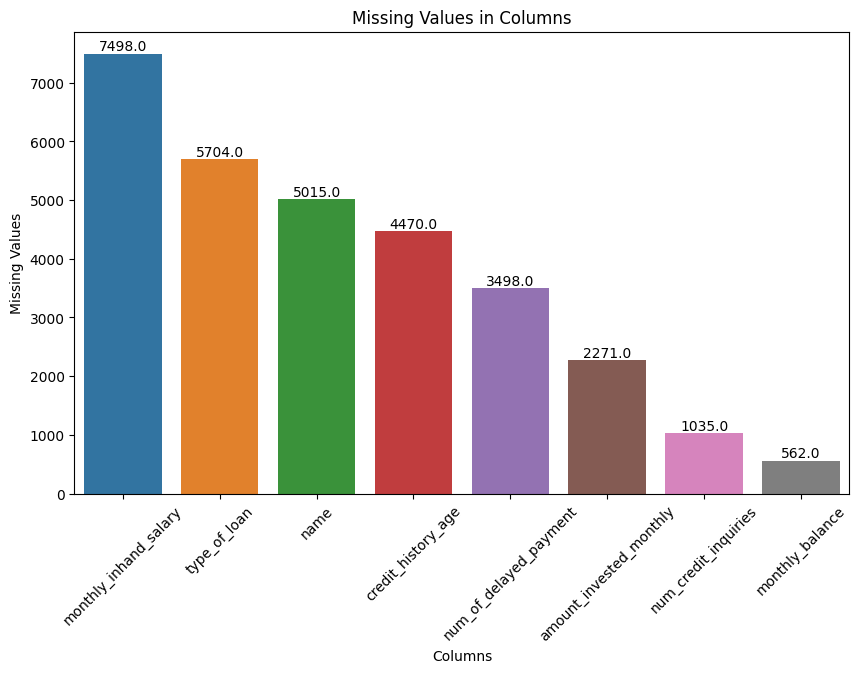

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9,13.27,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4,12.27,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5,11.27,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634


/tmp/ipython-input-158-1124730415.py:65: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cs_test_df['name'] = cs_test_df.groupby('customer_id')['name'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))


,customer_id,month,credit_history_age,credit_history_age_filled_incremented
0,CUS_0xd40,September,22 Years and 9 Months,22 Years and 9 Months
1,CUS_0xd40,October,22 Years and 10 Months,22 Years and 10 Months
2,CUS_0xd40,November,22 Years and 10 Months,22 Years and 11 Months
3,CUS_0xd40,December,23 Years and 0 Months,23 Years and 0 Months
4,CUS_0x21b1,September,27 Years and 3 Months,27 Years and 3 Months
5,CUS_0x21b1,October,27 Years and 4 Months,27 Years and 4 Months
6,CUS_0x21b1,November,27 Years and 5 Months,27 Years and 5 Months
7,CUS_0x21b1,December,27 Years and 6 Months,27 Years and 6 Months
8,CUS_0x2dbc,September,18 Years and 5 Months,18 Years and 5 Months
9,CUS_0x2dbc,October,18 Years and 6 Months,18 Years and 6 Months


Inconsistencies found in 'monthly_balance' column:
[nan '__-333333333333333333333333333__']
object
-500
997
count     50000
unique      976
top          39
freq       1493
Name: age, dtype: object
Inconsistent values found in 'age' column:
['24_' '41_' '40_' '32_' '42_' '33_' '38_' '-500' '37_' '19_' '21_' '46_'
 '22_' '20_' '35_' '8327_' '29_' '28_' '26_' '43_' '18_' '47_' '48_' '34_'
 '50_' '4610_' '27_' '31_' '36_' '45_' '51_' '39_' '25_' '52_' '55_' '23_'
 '30_' '44_' '17_' '56_' '53_' '16_' '2077_' '15_' '49_' '14_' '54_'
 '4943_' '619_' '2511_' '6647_' '5026_' '8245_' '2336_' '2926_' '8200_'
 '1916_' '8631_' '6400_' '4938_' '6470_' '1776_' '2389_' '914_' '6453_'
 '1882_' '7044_' '1018_' '1841_' '5714_' '4698_' '1210_' '3513_' '128_'
 '2974_' '7406_' '299_' '6031_' '909_' '6621_' '3474_' '831_' '217_'
 '8340_' '7868_' '1401_']
No obvious inconsistencies (non-digit characters) found in 'age'.
count    50000.000000
mean        33.818000
std         10.771038
min         14.000000
25

In [158]:
#all the above steps that I've performed for the cs_trained_df, let's perform them for the cs_test_df.
#change the column names to lower case.
cs_test_df.columns = cs_test_df.columns.str.lower()
# ## Data Cleaning
# ### Check For Duplicates
cs_test_df.duplicated().sum()
cs_test_df.duplicated().any()
# - The dataset contains 0 `Duplicate` values.
# ### Null Values Imputation
missing_values = cs_test_df.isnull().sum().sort_values(ascending=False)[cs_test_df.isnull().sum().sort_values(ascending=False) > 0]
missing_values
plt.figure(figsize=(10,6))
ax = sns.barplot(x=missing_values.index, y=missing_values.values, hue=missing_values.index)
plt.xticks(rotation=45)
plt.xlabel('Columns')
plt.ylabel('Missing Values')
plt.title('Missing Values in Columns')

# Add the counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()
# > let's deal with null values feature by feature.
# #### Monthly_Inhand_Salary
cs_test_df['customer_id'].unique()[:20]
cs_test_df[cs_test_df['customer_id'] == 'CUS_0xd40']
# - Customers are repeating means sometimes they provided their `monthly_inhand_salary` sometimes they didn't, So we need to fill the `monthly_inhand_salary` values with the provided ones with respect to the `customer_id`.
# Fill missing 'monthly_inhand_salary' values using forward and backward fill for each customer_id
cs_test_df['monthly_inhand_salary'] = cs_test_df.groupby('customer_id')['monthly_inhand_salary'].ffill().bfill()

# Display the rows for 'CUS_0x4100' to verify the filled value
display(cs_test_df[cs_test_df['customer_id'] == 'CUS_0xd40'])
# #### Type_of_Loan
cs_test_df.isnull().sum().sort_values(ascending=False)[cs_test_df.isnull().sum().sort_values(ascending=False) > 0]
# - There are `11408` missing values
#   - By analyzing the column we can fill them with two conditions:
#     - For those customers about we don't know what kind of loan they took, we can fill them with `unknown`.
#     - Or with respect to the `Customer_ID` we can fill the values using `mode()`.
cs_test_df[cs_test_df['customer_id']=='CUS_0xc163']
cs_test_df['type_of_loan'] = cs_test_df.groupby('customer_id')['type_of_loan'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))
cs_test_df[cs_test_df['customer_id']=='CUS_0xc163']
# #### Name
cs_test_df['name'].unique()[:20]
cs_test_df[cs_test_df['customer_id'] == 'CUS_0x6070']
# - We can fill missing values in `name` column with respect to the `customer_id` column.
#fills the missing values based on the customer_id column
cs_test_df['name'] = cs_test_df.groupby('customer_id')['name'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
# because a unique person will have unique customer_id if the customer shows up again it will have the same customer_id and based on the previous value of the same customer_id we can fill up the missing values.
# #### Credit_History_Age
cs_test_df.isnull().sum().sort_values(ascending=False)[cs_test_df.isnull().sum().sort_values(ascending=False) > 0]
cs_test_df['credit_history_age'].unique()[:10]
cs_test_df[cs_test_df['customer_id'] == 'CUS_0xd40']
# Apply ffill to fill initial missing credit_history_age values within each customer group
cs_test_df['credit_history_age'] = cs_test_df.groupby('customer_id')['credit_history_age'].ffill().bfill()

# Convert 'credit_history_age' to total months for easier calculation
def years_months_to_months(age_str):
    if pd.isnull(age_str):
        return np.nan
    parts = age_str.replace(' Years and ', ' ').replace(' Months', '').split()
    if len(parts) == 2:
        years, months = int(parts[0]), int(parts[1])
        return years * 12 + months
    return np.nan # Handle cases that don't match the format

cs_test_df['credit_history_months_total'] = cs_test_df['credit_history_age'].apply(years_months_to_months)
# Calculate the initial credit history in months for each customer
initial_credit_history = cs_test_df.groupby('customer_id')['credit_history_months_total'].transform('first')
# Calculate the number of months passed for each entry within each customer group
# Assuming the data is ordered by month for each customer
months_passed = cs_test_df.groupby('customer_id').cumcount()

# Calculate the new credit history in total months
cs_test_df['credit_history_months_incremented'] = initial_credit_history + months_passed
# Convert total months back to "XX Years and YY Months" format
def months_total_to_years_months(total_months):
    if pd.isnull(total_months):
        return np.nan
    years = int(total_months // 12)
    months = int(total_months % 12)
    return f"{years} Years and {months} Months"

cs_test_df['credit_history_age_filled_incremented'] = cs_test_df['credit_history_months_incremented'].apply(months_total_to_years_months)

# Display the original and new columns for a sample customer to verify
display(cs_test_df[['customer_id', 'month', 'credit_history_age', 'credit_history_age_filled_incremented']].head(20))
# - We want to increment the month count for the subsequent entries of the same customer to reflect the passage of time.
#
#  This requires a few steps: extracting the current years and months, converting them to a total number of months, adding 1 month for each subsequent entry of a customer, and then converting the total months back into the "XX Years and YY Months" format.
# #### Num_of_Delayed_Payments
cs_test_df.isnull().sum().sort_values(ascending=False)[cs_test_df.isnull().sum().sort_values(ascending=False) > 0]
cs_test_df['num_of_delayed_payment'].unique()[:10]
# - We can note that the `num_of_delayed_payment` can't be negative and the underscores dosn't imply anything, we need to fix it.
#remove inconsistencies
cs_test_df['num_of_delayed_payment'] = cs_test_df['num_of_delayed_payment'].replace('-', '').replace('_', '')

#fill missing values
cs_test_df['num_of_delayed_payment'] = cs_test_df.groupby('customer_id')['num_of_delayed_payment'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 0))
# #### Amount_Invested_Monthly
cs_test_df.isnull().sum().sort_values(ascending=False)[cs_test_df.isnull().sum().sort_values(ascending=False) > 0]
cs_test_df[cs_test_df['amount_invested_monthly'] == '__10000__']
#remove inconsistencies
cs_test_df['amount_invested_monthly'] = cs_test_df['amount_invested_monthly'].astype(str).str.replace('__', '', regex=False)

#change the datatype
cs_test_df['amount_invested_monthly'] = cs_test_df['amount_invested_monthly'].astype(float)

#fill null values
cs_test_df['amount_invested_monthly'] = cs_test_df.groupby('customer_id')['amount_invested_monthly'].transform(lambda x: x.fillna(x.mean() if pd.notna(x.mean()) else 0))
# #### Num_Credit_Inquiries
#
# - The num_credit_inquiries column likely represents the number of recent credit inquiries made for a customer. Credit inquiries happen when a lender checks your credit report, usually when you apply for new credit (like a loan or credit card).
#
#   In the context of credit scoring, a high number of recent credit inquiries can sometimes negatively impact a credit score as it might suggest a higher risk of taking on too much debt.
cs_test_df.isnull().sum().sort_values(ascending=False)[cs_test_df.isnull().sum().sort_values(ascending=False) > 0]
#fill the null values
cs_test_df['num_credit_inquiries'] = cs_test_df.groupby('customer_id')['num_credit_inquiries'].ffill().bfill()
# #### Monthly_Balance
# - **Overdraft**: If an account holder withdraws more money than is available in their account, the bank might allow the transaction to go through, resulting in an negative balance. This is known as an overdraft. Banks often charge fees for overdrafts.
# - **Fees and Charges:** Bank fees (like monthly maintenance fees, ATM fees, or late payment fees on linked credit products) can sometimes bring an account balance below zero if there aren't sufficient funds to cover them.
# - **Linked Credit Products**: If the bank account is linked to a credit card, loan, or line of credit, payments or charges related to these products might sometimes be drawn from the bank account, potentially resulting in a negative balance if the account is not adequately funded.
# In essence, a negative monthly balance indicates that the account holder owes the bank money.
cs_test_df.isnull().sum().sort_values(ascending=False)[cs_test_df.isnull().sum().sort_values(ascending=False) > 0]
cs_test_df['monthly_balance'].dtype
# Check for non-digit characters in the 'monthly_balance' column
inconsistent_values = cs_test_df[cs_test_df['monthly_balance'].astype(str).apply(lambda x: bool(re.search(r'[^\d.]', x)))]

if not inconsistent_values.empty:
    print("Inconsistencies found in 'monthly_balance' column:")
    # Display up to 10 inconsistent values as examples
    print(inconsistent_values['monthly_balance'].unique()[:10])
else:
    print("No obvious inconsistencies (non-digit characters other than '.') found in 'monthly_balance'.")
cs_test_df['monthly_balance'] = cs_test_df['monthly_balance'].str.replace('__', '', regex=False)
#change the dtype
cs_test_df['monthly_balance'] = pd.to_numeric(cs_test_df['monthly_balance'], errors='coerce')
#verify the dtype
cs_test_df['monthly_balance'].dtype
#fill the null values
cs_test_df['monthly_balance'] = cs_test_df.groupby('customer_id')['monthly_balance'].transform(lambda x: x.fillna(x.mean() if pd.notna(x.mean()) else 0))
# ### Fixing DataTypes
# - Columns datatypes needs to be fixed.
#   - `Age`, `SSN`, `Annual_Income`, `Num_of_loan`, `Num_of_Delayed_Payment`, `Changed_Credit_Limit`, `Outstanding_Debt`, `Amount_invested_monthly`, `Monthly_Balance`
print(cs_test_df['age'].dtype)
print(cs_test_df['age'].min())
print(cs_test_df['age'].max())
print(cs_test_df['age'].describe())
cs_test_df[cs_test_df['age'].apply(lambda x: bool(re.search(r'[^\d]', x)))]
# Check for non-digit characters in the 'age' column
inconsistent_age_values = cs_test_df[cs_test_df['age'].astype(str).apply(lambda x: bool(re.search(r'[^\d]', x)))]

if not inconsistent_age_values.empty:
    print("Inconsistent values found in 'age' column:")
    # Display all unique inconsistent age values
    print(inconsistent_age_values['age'].unique())
else:
    print("No obvious inconsistencies (non-digit characters) found in 'age'.")
# Replace '-' and '_' in 'age' column with empty string
cs_test_df['age'] = cs_test_df['age'].astype(str).str.replace(r'[-_]', '', regex=True)

# Check for non-digit characters in the 'age' column
inconsistent_age_values = cs_test_df[cs_test_df['age'].astype(str).apply(lambda x: bool(re.search(r'[^\d]', x)))]

if not inconsistent_age_values.empty:
    print("Inconsistent values found in 'age' column:")
    # Display all unique inconsistent age values
    print(inconsistent_age_values['age'].unique())
else:
    print("No obvious inconsistencies (non-digit characters) found in 'age'.")
cs_test_df['age'] = pd.to_numeric(cs_test_df['age'], errors='coerce')
# Replace VALUES FROM THE AGE COLUMN GREATER THAN 100 with np.nan
cs_test_df['age'] = cs_test_df['age'].apply(lambda x: np.nan if x > 100 else x)
# - As we all know that a person age could be maximumly of `100` years, It can go high but this is a one in million case. So, we'll just go with the 100.
cs_test_df['age'].isnull().sum()
#fill null values
cs_test_df['age'] = cs_test_df.groupby('customer_id')['age'].transform(lambda x: x.fillna(x.mean() if pd.notna(x.mean()) else 0))
print(cs_test_df['age'].describe())
# - It is telling us that we have customers of age 100, let's see if we really have.
#get the customer of age 100
cs_test_df[cs_test_df['age']== 100]
#see if the customer has consistent age across customer_id
cs_test_df[cs_test_df['customer_id']== 'CUS_0x3b9a']
#Replace values in age column with the first non_null value for the customer if against the same customer_id the age column has different values.
def fix_age_inconsistencies(df):
    # Identify customer_ids where 'age' has different values across rows
    age_diff_customers = df.groupby('customer_id')['age'].nunique()
    customers_with_diff_age = age_diff_customers[age_diff_customers > 1].index

    # Iterate through customers with inconsistent age
    for customer_id in customers_with_diff_age:
        # Get the rows for the current customer
        customer_rows = df[df['customer_id'] == customer_id].copy()

        # Identify the index of the first non-null age for the customer
        first_valid_index = customer_rows['age'].first_valid_index()

        if first_valid_index is not None:
            # Get the value of the first non-null age using the index
            age_to_use = customer_rows.loc[first_valid_index, 'age']

            # Replace all ages for this customer with the first valid age
            df.loc[df['customer_id'] == customer_id, 'age'] = age_to_use
        else:
            # If no non-null age exists for the customer, you might choose
            # to leave them as they are (potentially all NaN after cleaning)
            # or apply a global fill strategy if desired.
            # For this task, we assume the goal is to unify to a single value if one exists.
            pass # Or handle the case where all ages are null if needed

    return df

cs_test_df = fix_age_inconsistencies(cs_test_df)
#verify if the function worked correctly.
cs_test_df[cs_test_df['customer_id']== 'CUS_0x3b9a']
print(cs_test_df['age'].describe())
# - Now after cleaning this age column is giving us the best results. but as we are not performing EDA to get insights we will not go too deep.
# -------
# #### SSN-Social Security Number
# Now we don't need to clean this column as we have `customer_id` for the customers. but for data cleaning practices we can clean it.
cs_test_df['ssn']
inconsistent_ssn = cs_test_df[cs_test_df['ssn'].astype(str).apply(lambda x: bool(re.search(r'[^\d-]', x)))]

if not inconsistent_ssn.empty:
  print('Inconsistent SSN values found:')
  print(inconsistent_ssn['ssn'].unique())
else:
  "No inconsistent values found."
# Use .str.contains() to check for the substring within the Series
cs_test_df['ssn'] = cs_test_df['ssn'].astype(str).apply(lambda x: np.nan if '#F%$D@*&8' in x else x)
#fill missing values in ssn
cs_test_df['ssn'] = cs_test_df.groupby('customer_id')['ssn'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))
# -----
# #### Annual_Income
cs_test_df['annual_income']
inconsistent_annual_income = cs_test_df[cs_test_df['annual_income'].astype(str).apply(lambda x: bool(re.search(r'[^\d.]', x)))]

if not inconsistent_annual_income.empty:
  print('Inconsistent SSN values found:')
  print(inconsistent_annual_income['annual_income'].unique())
else:
  "No inconsistent values found."
#replace '_' with ''.
cs_test_df['annual_income'] = cs_test_df['annual_income'].astype(str).replace('_', '', regex=True)
#change th dtype
cs_test_df['annual_income'] = pd.to_numeric(cs_test_df['annual_income'], errors='coerce')
#fill the null values
cs_test_df['annual_income'] = cs_test_df.groupby('customer_id')['annual_income'].transform(lambda x: x.fillna(x.mean() if pd.notna(x.mean()) else 0))
# -----
# #### Num_of_Loan
cs_test_df['num_of_loan']
inconsistent_num_of_loan = cs_test_df[cs_test_df['num_of_loan'].astype(str).apply(lambda x: bool(re.search(r'[^\d]', x)))]

if not inconsistent_num_of_loan.empty:
  print('Inconsistent SSN values found:')
  print(inconsistent_num_of_loan['num_of_loan'].unique())
else:
  "No inconsistent values found."
#replace '_' with ''.
cs_test_df['num_of_loan'] = cs_test_df['num_of_loan'].astype(str).replace('_', '', regex=True)
#change th dtype
cs_test_df['num_of_loan'] = pd.to_numeric(cs_test_df['num_of_loan'], errors='coerce')
# -----
# #### Num_of_Delayed_Payments
cs_test_df['num_of_delayed_payment']
inconsistent_num_of_delayed_payment = cs_test_df[cs_test_df['num_of_delayed_payment'].astype(str).apply(lambda x: bool(re.search(r'[^\d]', x)))]

if not inconsistent_num_of_delayed_payment.empty:
  print('Inconsistent SSN values found:')
  print(inconsistent_num_of_delayed_payment['num_of_delayed_payment'].unique())
else:
  "No inconsistent values found."
#replace '_' with ''.
cs_test_df['num_of_delayed_payment'] = cs_test_df['num_of_delayed_payment'].astype(str).replace('_', '', regex=True).replace('-', '', regex=True)
#change the dtype
cs_test_df['num_of_delayed_payment'] = pd.to_numeric(cs_test_df['num_of_delayed_payment'], errors='coerce')
# -----
# #### Changed_Credit_Limit
cs_test_df['changed_credit_limit']
inconsistent_changed_credit_limit = cs_test_df[cs_test_df['changed_credit_limit'].astype(str).apply(lambda x: bool(re.search(r'[^\d.]', x)))]

if not inconsistent_changed_credit_limit.empty:
  print('Inconsistent changed_credit_limit values found:')
  print(inconsistent_changed_credit_limit['changed_credit_limit'].unique())
else:
  "No inconsistent values found."
# - A negative value in a 'changed_credit_limit' column would logically indicate a decrease in the credit limit. This is a perfectly valid scenario. For example, a bank might decrease a customer's credit limit due to changes in their creditworthiness or payment history.
#
#  Therefore, while the '_' is an inconsistency that needs to be handled, the negative values themselves are likely meaningful data points representing a reduction in the credit limit.
#remove the inconsistency
cs_test_df['changed_credit_limit'] = cs_test_df['changed_credit_limit'].astype(str).replace('_', '', regex=True)
#change the dtype
cs_test_df['changed_credit_limit'] = pd.to_numeric(cs_test_df['changed_credit_limit'], errors='coerce')
#fill the null values
cs_test_df['changed_credit_limit'] = cs_test_df.groupby('customer_id')['changed_credit_limit'].transform(lambda x: x.fillna(x.mean() if pd.notna(x.mean()) else 0))
# -----
# #### Outstanding Debt
cs_test_df['outstanding_debt']
inconsistent_outstanding_debt = cs_test_df[cs_test_df['outstanding_debt'].astype(str).apply(lambda x: bool(re.search(r'[^\d.]', x)))]

if not inconsistent_outstanding_debt.empty:
  print('Inconsistent outstanding_debt values found:')
  print(inconsistent_outstanding_debt['outstanding_debt'].unique())
else:
  "No inconsistent values found."
#remove the inconsistency
cs_test_df['outstanding_debt'] = cs_test_df['outstanding_debt'].astype(str).replace('_', '', regex=True)
#change the dtype
cs_test_df['outstanding_debt'] = pd.to_numeric(cs_test_df['outstanding_debt'], errors='coerce')
#fill the missing values
cs_test_df['outstanding_debt'] = cs_test_df.groupby('customer_id')['outstanding_debt'].transform(lambda x: x.fillna(x.mean() if pd.notna(x.mean()) else 0))
# ----
# #### Monthly_Balance
cs_test_df['monthly_balance']
inconsistent_monthly_balance = cs_test_df[cs_test_df['monthly_balance'].astype(str).apply(lambda x: bool(re.search(r'[^\d.]', x)))]

if not inconsistent_monthly_balance.empty:
  print('Inconsistent monthly_balanceested_monthly values found:')
  print(inconsistent_monthly_balance['monthly_balance'].unique())
else:
  "No inconsistent values found."
# ---
# #### Occupation
cs_test_df['occupation'].value_counts()
cs_test_df[cs_test_df['occupation'] == '_______']
#remove inconsistency
cs_test_df['occupation'] = cs_test_df['occupation'].replace('_______', np.nan)
#fill missing values
cs_test_df['occupation'] = cs_test_df.groupby('customer_id')['occupation'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))
cs_test_df.head()
# ---
# #### Credit_Mix
cs_test_df['credit_mix'].value_counts()
#remove inconsistency
cs_test_df['credit_mix'] = cs_test_df['credit_mix'].replace('_', np.nan)
#fill nbull values
cs_test_df['credit_mix'] = cs_test_df.groupby('customer_id')['credit_mix'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))
# ---
# #### Payment_Behaviour
cs_test_df['payment_behaviour'].value_counts()
cs_test_df[cs_test_df['payment_behaviour'] == '!@9#%8']
cs_test_df[cs_test_df['customer_id'] == 'CUS_0xd40']
#remove the inconsistencies
cs_test_df['payment_behaviour'] = cs_test_df['payment_behaviour'].replace('!@9#%8', np.nan)
#fill the null values
cs_test_df['payment_behaviour'] = cs_test_df.groupby('customer_id')['payment_behaviour'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))
# Now that we have successfully Cleaned our data it is ready to be subjected to EDA, If you think that there are better and easy ways to do cleaning then feel free to fork this notebook.
print(cs_test_df.head(20))

In [162]:
#save the training data
cs_train_df.to_csv('train_df_cleaned.csv', index=False)

#save the test data in csv format
cs_test_df.to_csv('test_df_cleaned.csv', index=False)